# Learning Pandas with Pokémon

*Data analysis and manipulation using the Pokémon dataset.*

This first post on Acta Machina will introduce you to Pandas, a Python package that forms the backbone of both the data scientist and machine learning engineer's toolkit. Pandas lets you manipulate and analyse data. You can think of it as an advanced, command-based version of Microsoft Excel. Having a solid understanding of Pandas will allow you to read future posts with greater ease. Pandas was developed by Wes McKinney in 2008 at AQR Capital Management.

In this post, you'll learn how to:
- create DataFrames (the equivalent of a spreadsheet);
- select data from DataFrames;
- group data and make meaningful aggregations; and
- plot the data.

By the end, you'll learn how to create a plot visualising the combat power of legendary Pokémon across different generations:

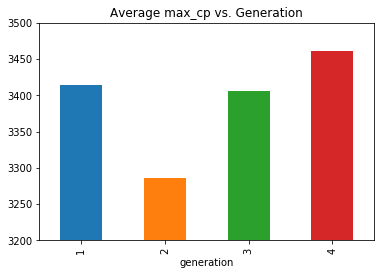

In [71]:
average_max_cp_by_generation.plot.bar(ylim=(3200, 3500), title='Average max_cp vs. Generation');

This [notebook is available on GitHub](https://github.com/ActaMachina/notebooks/00-pokemon.ipynb) and the [data is hosted on Amazon CloudFront]({{ site.url }}/data/00-pokemon.zip).

## Preamble

In [47]:
from IPython.display import HTML

pd.set_option('display.max_rows', 5)

def display_(df):
    current_max_colwidth = pd.get_option('display.max_colwidth')
    pd.set_option('display.max_colwidth', -1)
    
    df = df.copy()
    df['image'] = ('<img src="data/pokemon/icons/pokemon_icon_' +
                   df.index.astype(str).str.pad(3, fillchar='0') +
                   np.where(df.index.isin([201, 327, 351, 386, 487, 492]), '_11.png"/>', '_00.png"/>'))
    
    html = HTML(df.to_html(escape=False, max_rows=pd.get_option('display.max_rows')))
    df.drop('image', axis=1, inplace=True)
    pd.set_option('display.max_colwidth', current_max_colwidth)
    
    return html

## Getting Started

Import Pandas to get started:

In [48]:
import pandas as pd

To create a DataFrame, use a list of dictionaries, with the names of the columns as keys:

In [49]:
df = pd.DataFrame([{'id': 1, 'name': 'Bulbasaur'},
                   {'id': 2, 'name': 'Ivysaur'},
                   {'id': 3, 'name': 'Venusaur'}])

To display a DataFrame, just put the variable on its own line.

In [50]:
df

,id,name
0,1,Bulbasaur
1,2,Ivysaur
2,3,Venusaur


To retrieve the values of a column (called a data series), you can use the column name as a key:

In [51]:
df['name']  # or df.name

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: name, dtype: object

To get rows, you can use indices to slice a DataFrame:

In [52]:
df[0:2]

,id,name
0,1,Bulbasaur
1,2,Ivysaur


To make it easier to reference a specific row, set the index of the DataFrame to one of its columns:

In [53]:
df = df.set_index('id')
df

,name
id,
1,Bulbasaur
2,Ivysaur
3,Venusaur


Now, to retrieve a specific row using the index, we can write:

In [54]:
df[df.index == 1]

,name
id,
1,Bulbasaur


## Importing Entries from the Pokédex

Let's load a longer list of Pokémon from a `csv` file (obtained from the [GamePress Pokémon List](https://pokemongo.gamepress.gg/pokemon-list)), setting the index to the `id` column:

In [55]:
df_pokemon = pd.read_csv('data/pokemon/pokedex.csv', index_col='id')

Let's have a look at Pokémon #1 to see what additional columns were in the file:

In [56]:
display_(df_pokemon[df_pokemon.index == 1])

,name,type1,type2,height,weight,max_cp,generation,legendary,image
id,,,,,,,,,
1,Bulbasaur,Grass,Poison,0.7,6.9,981,1,False,


Looks like Bulbasaur is a Grass/Poison type Pokémon!

All Pokémon have either one or two types. A Pokémon's type makes it a stronger attacker against some types but weaker against others. E.g. A water-type Pokémon (like Squirtle) has 2 x damage against fire-type Pokémon but only 0.5 x damage against Electric Pokémon.

Let's pull up all the Pokémon that have Grass as either `type1` or `type2`.

In [57]:
display_(df_pokemon[(df_pokemon.type1 == 'Grass') | (df_pokemon.type2 == 'Grass')])

,name,type1,type2,height,weight,max_cp,generation,legendary,image
id,,,,,,,,,
1,Bulbasaur,Grass,Poison,0.7,6.9,981,1,False,
2,Ivysaur,Grass,Poison,1.0,13.0,1552,1,False,
...,...,...,...,...,...,...,...,...,...
470,Leafeon,Grass,NaN,1.0,25.5,2944,4,False,
492,Shaymin,Grass,NaN,0.2,2.1,3265,4,False,


How powerful are Grass-type Pokémon?

To answer this question we need to briefly delve into the Pokémon game mechanics. Combat Power (CP) is a measure of the strength of a Pokémon when battling another Pokémon. This is dependent on two things: (i) the Pokémon's Level; and (ii) its Individual Values (IVs). While a Pokémon's Level can change by incrementally powering it up, a Pokémon's IVs are three fixed values (each ranging from 1-15) that cannot be changed. Therefore the maximum combat power (or `max_cp`) of a Pokémon can be obtained only when it is fully powered up and when it has a perfect set of 15/15/15 IVs.

To find out how powerful Grass-type Pokémon are on average, we can calculate their average maximum combat power (or `max_cp`).

In [58]:
df_pokemon[(df_pokemon.type1 == 'Grass') | (df_pokemon.type2 == 'Grass')].max_cp.mean()

1702.0363636363636

This seems high, but how does it compare to Poison-type Pokémon?

In [59]:
df_pokemon[(df_pokemon.type1 == 'Poison') | (df_pokemon.type2 == 'Poison')].max_cp.mean()

1559.54

Looks like Grass-type have Poison-type Pokémon beat!

Now this has me wondering, what are all the different Pokémon types?

In [60]:
set(list(df_pokemon.type1.unique()) +
    list(df_pokemon.type2.unique()))

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 nan}

If you look at the list of Pokémon types, you can see the value `nan` at the end. `NaN` (or `nan`) stands for "Not a Number" and is a special placeholder used for when no value can be computed or exists. Pandas uses this not only for numbers but whenever there's a missing value of any type.

Some operations can only be performed on a complete dataset with no missing values. In such a case, rows with `NaN`s can be removed using `dropna()` or imputed (meaningfully filled in) using `fillna()`.

Let's calculate each Pokémon's body mass index (BMI) for fun! We assign it to a new column and call it `bmi`.

In [61]:
df_pokemon['bmi'] = df_pokemon.weight / (df_pokemon.height**2)
display_(df_pokemon)

,name,type1,type2,height,weight,max_cp,generation,legendary,bmi,image
id,,,,,,,,,,
1,Bulbasaur,Grass,Poison,0.7,6.9,981,1,False,14.081633,
2,Ivysaur,Grass,Poison,1.0,13.0,1552,1,False,13.000000,
...,...,...,...,...,...,...,...,...,...,...
491,Darkrai,Dark,NaN,1.5,50.5,3739,4,False,22.444444,
492,Shaymin,Grass,NaN,0.2,2.1,3265,4,False,52.500000,


Now, which Pokémon is tallest? To find out, we can sort by `height`.

In [62]:
display_(df_pokemon.sort_values(by='height', ascending=False))

,name,type1,type2,height,weight,max_cp,generation,legendary,bmi,image
id,,,,,,,,,,
321,Wailord,Water,NaN,14.50,398.0,2258,3,False,1.892985,
208,Steelix,Ground,Steel,9.19,400.0,2439,2,False,4.736188,
...,...,...,...,...,...,...,...,...,...,...
433,Chingling,Psychic,NaN,0.20,0.6,1005,4,False,15.000000,
492,Shaymin,Grass,NaN,0.20,2.1,3265,4,False,52.500000,


The data in different columns have different types. Calling `dtypes` (short for data types) on a DataFrame gives you a list of its columns and their corresponding data types:

In [63]:
df_pokemon.dtypes

name          object
type1         object
              ...   
legendary       bool
bmi          float64
Length: 9, dtype: object

The 7 different data types in Pandas are:
    
| Data Type  | Description                       | Example                 |
| ---------- | --------------------------------- | ------------------------|
| object     | Text                              | Hello World             |
| int64      | Integer numbers                   | 0, 1, -123, 9876        |
| float64    | Floating point numbers            | 0.0001, 3.14159         |
| bool       | True/false values                 | True, False             |
| datetime64 | Date and time values              | 2007-06-29 09:41:00     |
| timedelta  | Differences between two datetimes | 42 nanoseconds          |
| category   | Finite list of text values        | [apple, banana, carrot] |

## Plotting

Finally, let's round out this introduction to Pandas by visualise the `max_cp` of legendary Pokémon across different generations.

To do this, let's start off by isolating the legendary Pokémon to a new DataFrame:

In [68]:
df_legendary_pokemon = df_pokemon[df_pokemon.legendary]
display_(df_legendary_pokemon)

,name,type1,type2,height,weight,max_cp,generation,legendary,bmi,image
id,,,,,,,,,,
144,Articuno,Flying,Ice,1.7,55.4,2933,1,True,19.169550,
145,Zapdos,Electric,Flying,1.6,52.6,3330,1,True,20.546875,
...,...,...,...,...,...,...,...,...,...,...
487,Giratina,Dragon,Ghost,4.5,750.0,3379,4,True,37.037037,
488,Cresselia,Psychic,NaN,1.5,85.6,2857,4,True,38.044444,


Then we group them together by generation, calculating the average `max_cp` within each generation group:

In [65]:
average_max_cp_by_generation = df_legendary_pokemon.groupby('generation').max_cp.mean()
average_max_cp_by_generation

generation
1    3415.000000
2    3286.750000
3    3406.125000
4    3460.888889
Name: max_cp, dtype: float64

Now we can go ahead and plot the series:

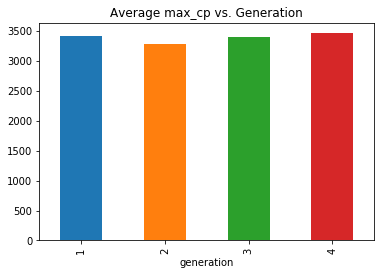

In [73]:
average_max_cp_by_generation.plot(kind='bar', title='Average max_cp vs. Generation');

Since all the values are bunched up close together, we can change the y-axis limits to make the differences more pronounced:

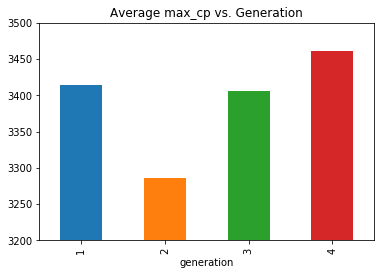

In [72]:
average_max_cp_by_generation.plot.bar(ylim=(3200, 3500), title='Average max_cp vs. Generation');

And that's it! It seems that, on average, the legendary Pokémon in Generation 4 are the strongest while those in Generation 2 are the weakest.

## Summary and Next Steps

In this post, you've learnt how to:
- create DataFrames (the equivalent of a spreadsheet)
- select data from DataFrames
- group data and make meaningful aggregations; and
- plot the data.

You're now familiar with basic analysis and data manipulation using Pandas. This will go a long way in helping you understand how data scientists and machine learning engineers manipulate data and will be indispensible over the next few posts and beyond.

If you'd like to learn more about the full power of Pandas (such as merging datasets, dealing with time series data and exporting datasets), I recommend reading through the extremely well-written [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/tutorials.html). The author of Pandas, Wes McKinney, has also written a book, [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662), that is clear and full of examples.

## Acknowledgements

This post has been inspired by posts from:

- [10 Minute to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
- [A Gentle Visual Intro to Data Analysis in Python Using Pandas](https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/)
- [GamePress Pokémon List](https://pokemongo.gamepress.gg/pokemon-list)
- [Kaggle Data Visualization Course](https://www.kaggle.com/learn/data-visualisation)
- [Kaggle Pandas Course](https://www.kaggle.com/learn/pandas)